In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.dcp.haze_remover import HazeRemover

In [3]:
TEST_IMAGE_SUNNY = "datasets/a9_dataset_r01_s03/_images/s040_camera_basler_north_16mm/1617874290_021000000_s040_camera_basler_north_16mm.png"
TEST_IMAGE_SNOWY = "datasets/a9_dataset_r01_s01/_images/s040_camera_basler_north_16mm/1607511137_552725296_s040_camera_basler_north_16mm.png"
TEST_IMAGE_FOGGY = "datasets/a9_dataset_r01_s02/_images/s040_camera_basler_north_16mm/1607959876_547210090_s040_camera_basler_north_16mm.png"

In [17]:
sunny = cv2.imread(TEST_IMAGE_SUNNY); sunny = cv2.resize(sunny, (640, 640)); sunny_rgb = cv2.cvtColor(sunny, cv2.COLOR_BGR2RGB); sunny_gray = cv2.cvtColor(sunny, cv2.COLOR_BGR2GRAY)
snowy = cv2.imread(TEST_IMAGE_SNOWY); snowy = cv2.resize(snowy, (640, 640)); snowy_rgb = cv2.cvtColor(snowy, cv2.COLOR_BGR2RGB); snowy_gray = cv2.cvtColor(snowy, cv2.COLOR_BGR2GRAY)
foggy = cv2.imread(TEST_IMAGE_FOGGY); foggy = cv2.resize(foggy, (640, 640)); foggy_rgb = cv2.cvtColor(foggy, cv2.COLOR_BGR2RGB); foggy_gray = cv2.cvtColor(foggy, cv2.COLOR_BGR2GRAY)

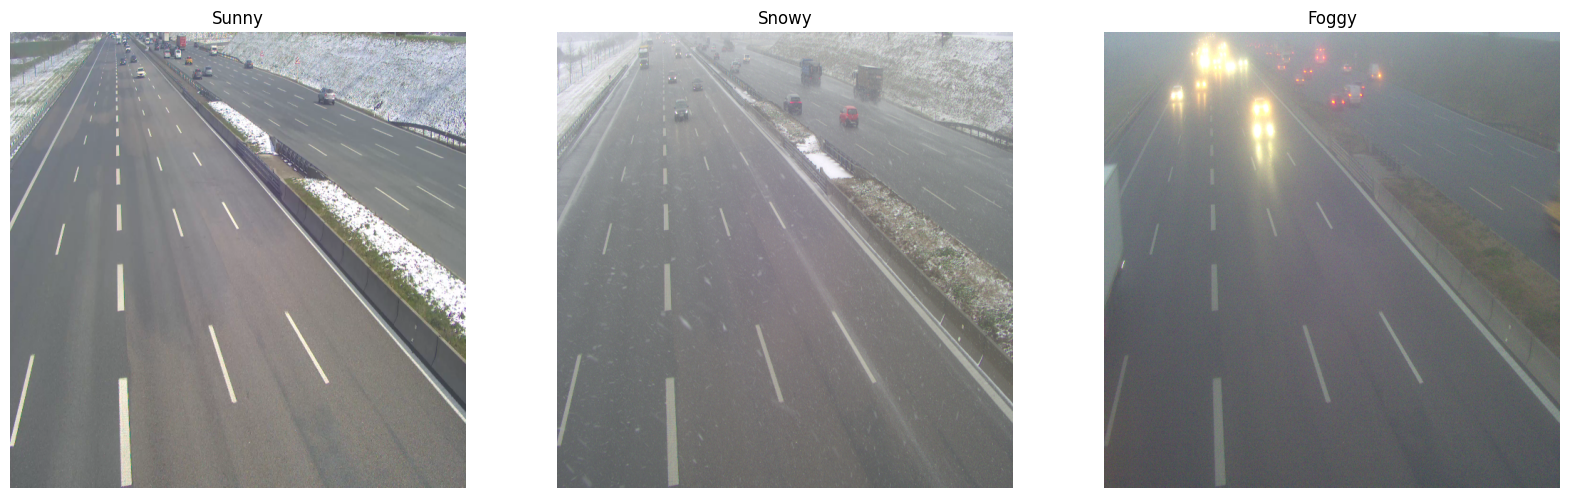

In [18]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(sunny_rgb)
plt.title('Sunny')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(snowy_rgb)
plt.title('Snowy')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(foggy_rgb)
plt.title('Foggy')
plt.axis('off')

plt.show()

In [6]:
clahe = cv2.createCLAHE()
sunny_equalized = clahe.apply(sunny_gray)
snowy_equalized = clahe.apply(snowy_gray)

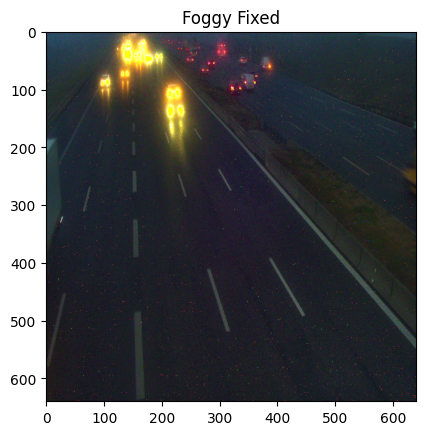

In [7]:
haze_remover = HazeRemover()
foggy_dehazed = haze_remover.remove_haze(foggy_rgb)

plt.title('Foggy Fixed')
plt.imshow(foggy_dehazed)
plt.show()

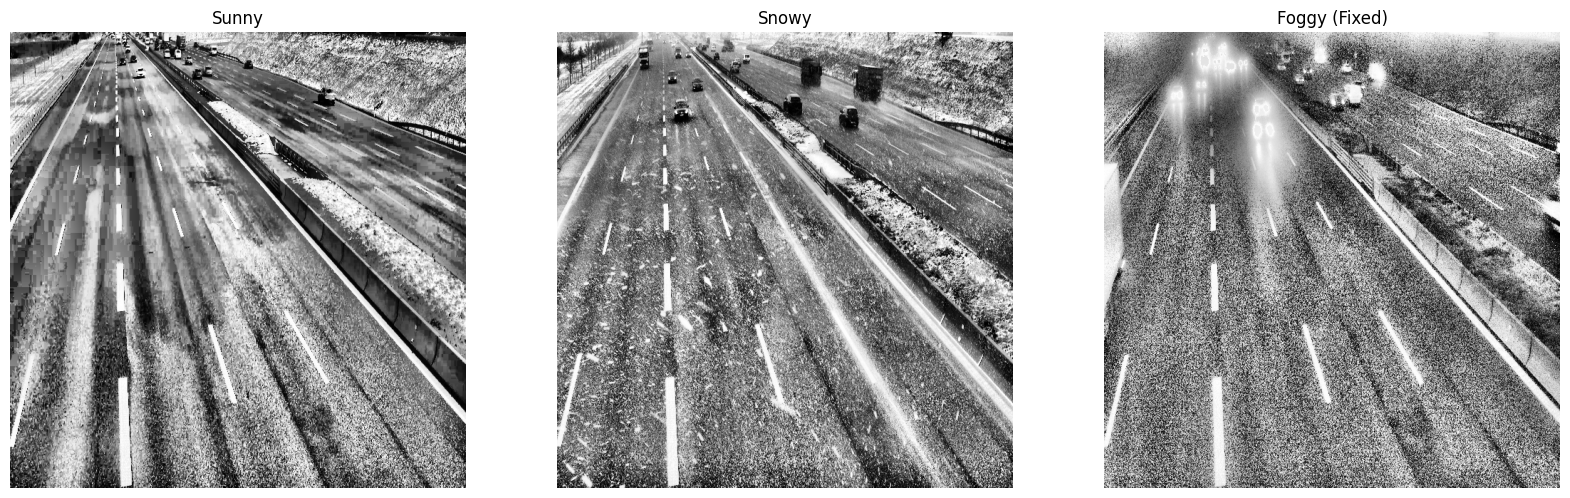

In [8]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(sunny_equalized, 'gray')
plt.title('Sunny')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(snowy_equalized, 'gray')
plt.title('Snowy')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(clahe.apply(cv2.cvtColor(foggy_dehazed, cv2.COLOR_RGB2GRAY)), 'gray')
plt.title('Foggy (Fixed)')
plt.axis('off')

plt.show()

In [9]:
def variance_of_laplacian(image):
  '''Return average variance of horizontal lines of a grayscale image'''
  return cv2.Laplacian(image, cv2.CV_64F).var()

def is_foggy(image):
  var_l = variance_of_laplacian(image)
  return var_l < 50

In [10]:
print('Foggy' if is_foggy(cv2.medianBlur(sunny_gray, 3)) else "Clear")
print('Foggy' if is_foggy(cv2.medianBlur(snowy_gray, 3)) else "Clear")
print('Foggy' if is_foggy(cv2.medianBlur(foggy_gray, 3)) else "Clear")

Clear
Clear
Foggy


In [11]:
print('Foggy' if is_foggy(sunny_gray) else "Clear")
print('Foggy' if is_foggy(snowy_gray) else "Clear")
print('Foggy' if is_foggy(foggy_gray) else "Clear")

Clear
Clear
Clear


In [13]:
haze_remover = HazeRemover()
clahe = cv2.createCLAHE(2.0, (8, 8))

def preprocess(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_final = cv2.medianBlur(img_gray, 3)
  
  if is_foggy(img_gray_final):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_dehazed = haze_remover.remove_haze(img_rgb)
    img_dehazed = np.clip(img_dehazed, 0, 255).astype(np.uint8)
    
    img_gray_final = cv2.cvtColor(img_dehazed, cv2.COLOR_RGB2GRAY)
  
  img_clahe = clahe.apply(img_gray_final)
  
  return img_clahe.astype(np.float32)

preprocessed_sunny = preprocess(sunny)
preprocessed_snowy = preprocess(snowy)
preprocessed_foggy = preprocess(foggy)

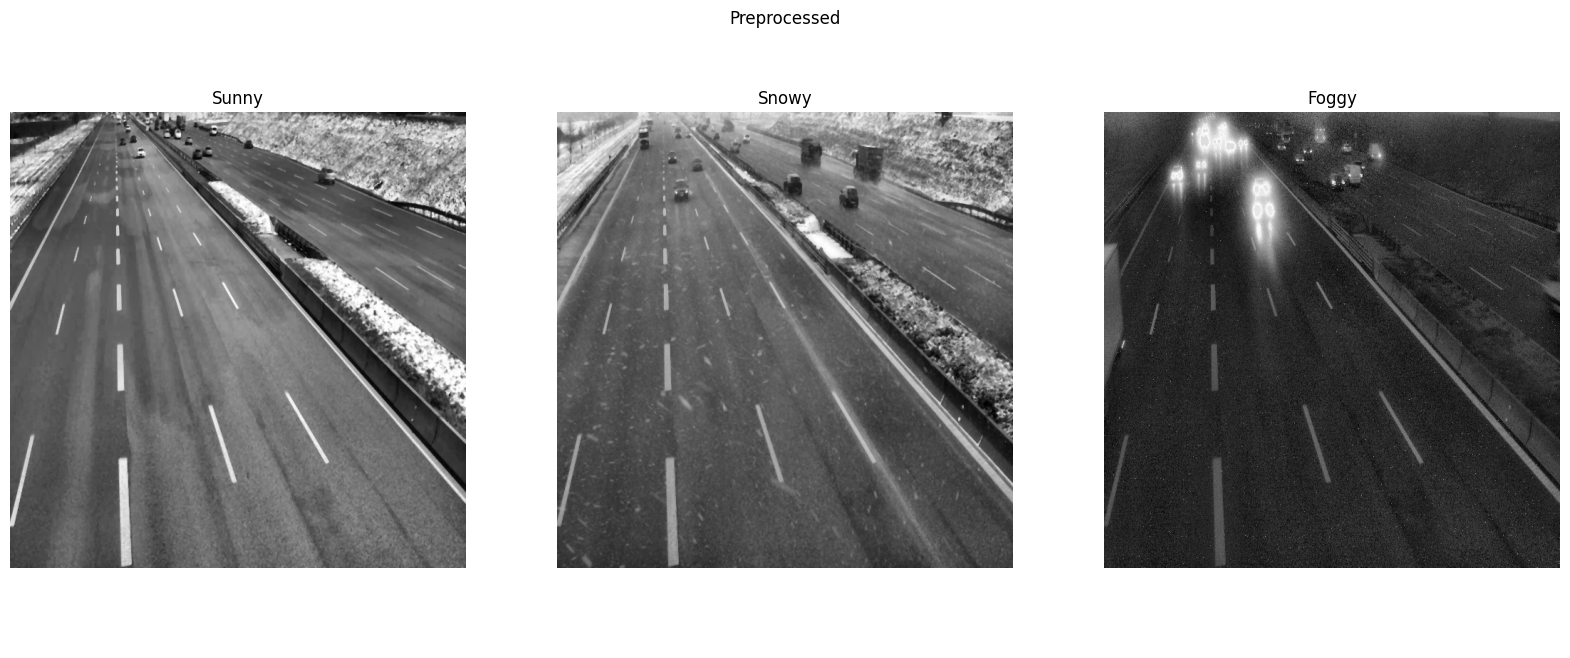

In [14]:
plt.figure(figsize=(20, 8))

plt.title('Preprocessed')
plt.axis('off')

plt.subplot(1, 3, 1)
plt.imshow(preprocessed_sunny, 'gray')
plt.title('Sunny')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(preprocessed_snowy, 'gray')
plt.title('Snowy')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(preprocessed_foggy, 'gray')
plt.title('Foggy')
plt.axis('off')

plt.show()